# Polynomial Regression

## Importing the libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [29]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values #we don't want the first column
y = dataset.iloc[:,-1].values

In [30]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [31]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Training the Linear Regression model on the whole dataset

In [32]:
from sklearn.linear_model import LinearRegression
#here we have two regressors
lin_reg = LinearRegression()
lin_reg.fit(X, y) #we didn't split our data to training set and test set
#building y = b0 + b1x1

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [33]:
#we use multiple linear regression but instead of having x1, x2, ... we
#have x1, x1^2, ... having a matrix feature according to power of x1
from sklearn.preprocessing import PolynomialFeatures
# because we want to preprocess our feature x1
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
#fit.transform to transform the matrix of feature x1 to matrix of feature x1^2
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
#building b2x1^2 and linear regression for b--> result: y = b0+ b1.x1+b2.x1^2

LinearRegression()

## Visualising the Linear Regression results

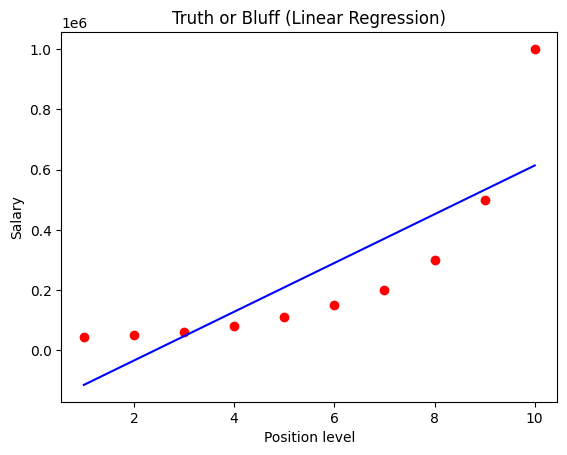

In [35]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X),color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Obviously linear regression is not a good model to predict this dataset

## Visualising the Polynomial Regression results

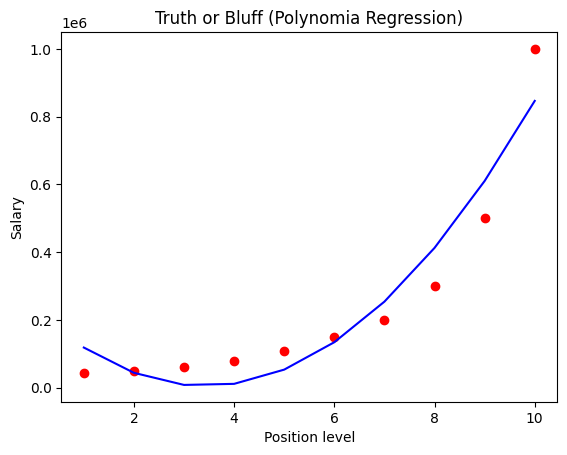

In [37]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(X_poly),color='blue')
plt.title('Truth or Bluff (Polynomia Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [38]:
#increase degree
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
#fit.transform to transform the matrix of feature x1 to matrix of feature x1^2
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

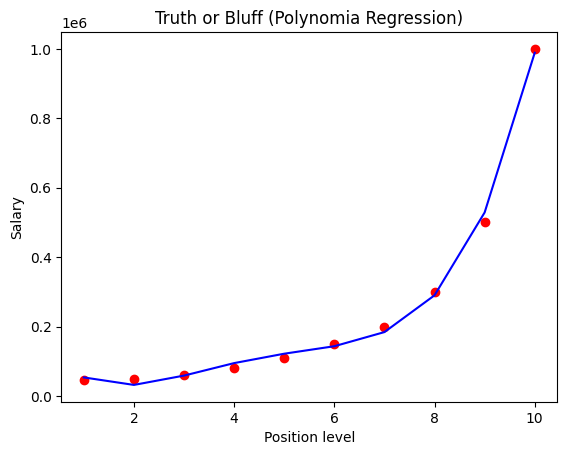

In [40]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(X_poly),color='blue')
plt.title('Truth or Bluff (Polynomia Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

This is a perfect prediction according to degree = 4

<ipython-input-42-5c254291094c>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


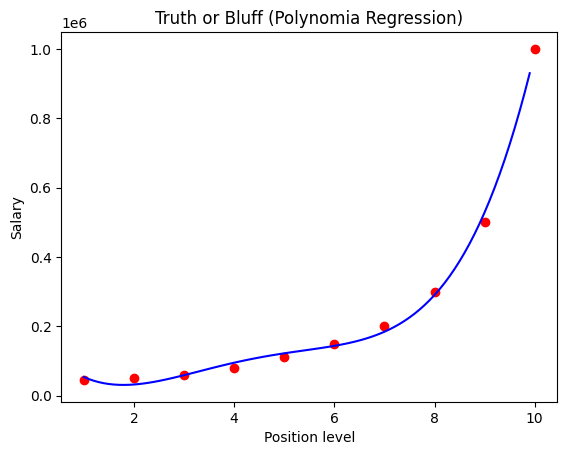

In [42]:
#Another way of visualizing the plot
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color ='blue')
plt.title('Truth or Bluff (Polynomia Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [43]:
#predicted salary for a person in level 6.5 by linear regression
lin_reg.predict([[6.5]])
#looking at the plot tells us this is a very bad prediction

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [45]:
#predicted salary for a person in level 6.5 by linear regression
#we have degree = 4
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

The current salary for a person in level 6 is:150000 and for a person in level
7 is 200000. The predicted salary for a person in leve 6.5 is 158862.45 which is a very good prediction